<a href="https://colab.research.google.com/github/Dyouvrean/STATS-503-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
import missingno as msno
from collections import Counter
pd.options.display.max_seq_items = 2000

# Load Data


*   tables_names - list all the table name in the database
*   League - league and country info
*   Match - Match table with 115 variables
*   Player - information about Player 



In [4]:
database = '/content/drive/MyDrive/STATS503/database.sqlite'
conn = sql.connect(database)


tables_names = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables_names

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [ ]:
league=pd.read_sql("""SELECT *
                        FROM Country C, League L
                        WHERE C.id= L.country_id;""", conn)
league= league.loc[:,~ league.columns.duplicated()].copy()
league

In [61]:
Match = pd.read_sql("""SELECT * , C.name country, L.name League
                       FROM  Match M ,Country C, League L
                       WHERE C.id= L.country_id AND 
                             M.country_id=C.id AND M.league_id= L.id
                       ;""", conn)
Match = Match.loc[:,~Match.columns.duplicated()].copy()
Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [ ]:
Player = pd.read_sql("""SELECT DISTINCT * 
                       FROM  Player P, Player_Attributes PA
                       WHERE P.player_api_id= PA.player_api_id
                       ;""", conn)
Player

In [ ]:
Player = Player .loc[:,~Player .columns.duplicated()].copy()
Player.columns

# EDA

## Get the formation of team 

In [ ]:
Match.columns

In [49]:
def get_formation(row,home):
    home_players_y = [row['home_player_Y%d' % i] for i in range(1,12)]
    away_players_y = [row['home_player_Y%d' % i] for i in range(1,12)]
    formations = [None] * 2
    for i in range(2):
        formation_dict=Counter(players_y[i]);
        sorted_keys = sorted(formation_dict)
        formation = ''
        for key in sorted_keys[1:-1]:
            y = formation_dict[key]
            formation += '%d-' % y
        formation += '%d' % formation_dict[sorted_keys[-1]] 
        formations[i] = formation
    return formations[home]

In [62]:
Match["home_form"]=Match.apply(lambda row: get_formation(row,0),axis=1)
Match["away_form"]=Match.apply(lambda row: get_formation(row,1),axis=1)
Match=Match.drop(['home_player_Y%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['away_player_Y%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['home_player_X%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['away_player_X%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['country_id','league_id'],axis=1)

## imputation missing value

In [ ]:
Match.isna().sum()[Match.isna().sum( )!=0]

<Axes: >

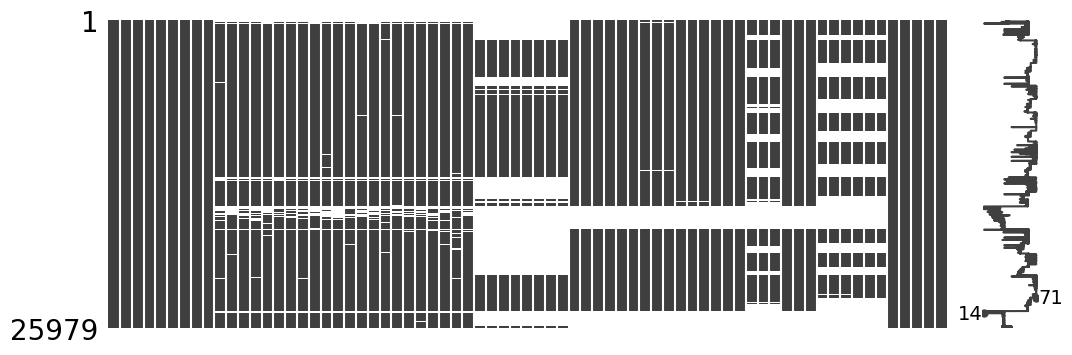

In [83]:
msno.matrix(Match, figsize=(12,4))

<Axes: >

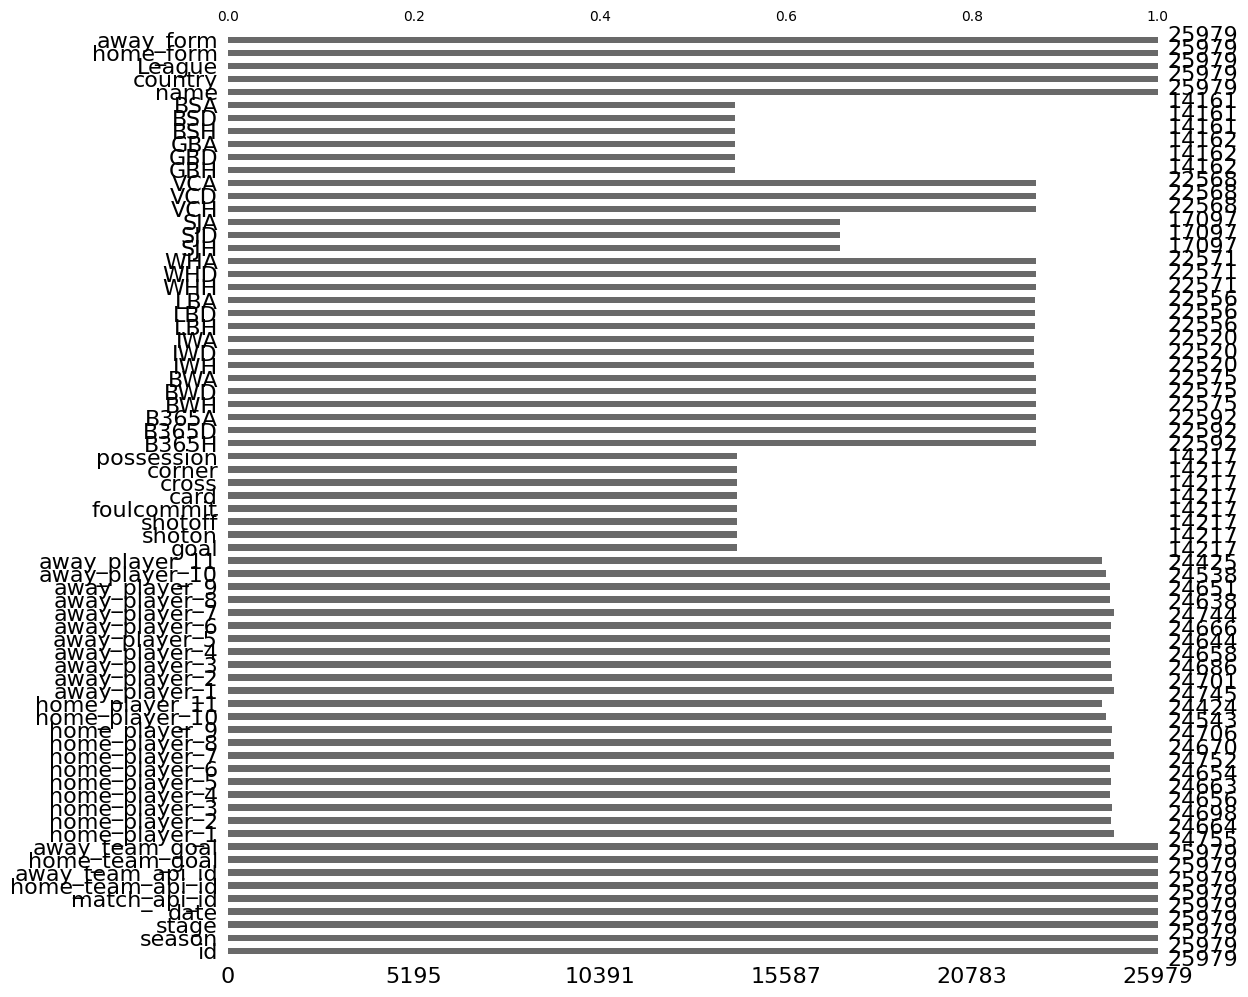

In [82]:
msno.bar(Match, figsize=(12,12))

### Delete the variables missing over 50% of records

In [ ]:
null_list= Match.isnull().sum()
total_obs= len(Match)
radio=0.5
to_be_drop=null_list[null_list>total_obs*radio]
to_be_drop.index
Match=Match.drop(to_be_drop.index,axis=1)
Match.isna().sum()[Match.isna().sum( )!=0]

### visualization of variable

In [ ]:
Match_no_player=Match.drop(['home_player_%d' % i for i in range(1,12)],axis=1)
Match_no_player=Match_no_player.drop(['away_player_%d' % i for i in range(1,12)],axis=1)
Match_no_player=Match_no_player.drop(['match_api_id','home_team_api_id','away_team_api_id'],axis=1)
Match_no_player.columns

In [ ]:
_= sns.pairplot(Match, diag_kind="hist")